## Capstone Project - GTSRB (German Traffic Sign Recognition Benchmark)

GTSRB (German Traffic Sign Recognition Benchmark) is a dataset created in Germany to recognize traffic signs. This project aims to automatically classify traffic signs from this dataset using deep learning methods. In our project, we will first determine our file path and labels. Then we will read our images. After preparing the CNN layers, we will give the model for training. Finally, we will save our model and turn it into a website.

<img src='gtsrb.jpg' width=350 >

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from IPython.display import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import warnings
warnings.filterwarnings('ignore')

In [7]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


In [8]:
print(os.listdir('/kaggle/input/gtsrb-german-traffic-sign/Train/'))

['7', '17', '19', '22', '2', '35', '23', '10', '5', '36', '20', '27', '41', '39', '32', '25', '42', '8', '38', '12', '0', '31', '34', '18', '28', '16', '13', '26', '15', '3', '1', '30', '14', '4', '9', '21', '40', '6', '11', '37', '33', '29', '24']


In [10]:
print(os.listdir('/kaggle/input/gtsrb-german-traffic-sign/Test/'))

['01301.png', '02578.png', '06781.png', '11396.png', '00929.png', '04915.png', '07470.png', '08216.png', '12329.png', '02630.png', '03862.png', '01883.png', '00704.png', '03163.png', '01124.png', '04159.png', '01570.png', '07161.png', '05717.png', '03092.png', '06102.png', '03663.png', '10760.png', '04084.png', '04216.png', '02640.png', '02422.png', '03434.png', '02284.png', '00562.png', '08028.png', '02715.png', '00237.png', '02606.png', '03852.png', '08057.png', '07814.png', '02073.png', '00406.png', '12204.png', '01582.png', '10188.png', '05084.png', '06076.png', '06877.png', '00448.png', '11953.png', '09031.png', '01686.png', '00255.png', '12139.png', '09393.png', '00435.png', '06852.png', '11572.png', '07968.png', '07430.png', '05130.png', '02247.png', '08725.png', '11070.png', '00365.png', '07901.png', '11927.png', '06027.png', '04766.png', '10107.png', '05649.png', '04710.png', '00105.png', '09360.png', '02626.png', '09210.png', '06426.png', '01574.png', '03495.png', '01523.png'

### Reading the pictures and labels

In [11]:
labels=['7', '17', '19', '22', '2', '35', '23', '10', '5', '36', '20', '27', '41', '39', '32', '25', '42', 
        '8', '38', '12', '0', '31', '34', '18', '28', '16', '13', '26', '15', '3', '1', '30', '14', '4', '9', 
        '21', '40', '6', '11','37', '33', '29', '24']
img_path='/kaggle/input/gtsrb-german-traffic-sign/Train/'

In [12]:
print(len(labels))

43


In [13]:
img_list=[]
label_list=[]

for label in labels:
    for img_file in os.listdir(img_path+label):
            img_list.append(img_path+label+'/'+img_file)
            label_list.append(label)

In [14]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [15]:
df.sample(5)

img label
7747   /kaggle/input/gtsrb-german-traffic-sign/Train/...    10
15594  /kaggle/input/gtsrb-german-traffic-sign/Train/...     8
10383  /kaggle/input/gtsrb-german-traffic-sign/Train/...     5
15341  /kaggle/input/gtsrb-german-traffic-sign/Train/...     8
34180  /kaggle/input/gtsrb-german-traffic-sign/Train/...     9

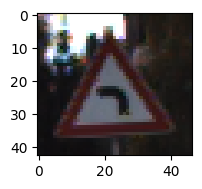

In [16]:
p='/kaggle/input/gtsrb-german-traffic-sign/Train/19/00019_00006_00013.png'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.show()

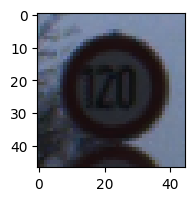

In [17]:
p='/kaggle/input/gtsrb-german-traffic-sign/train/8/00008_00034_00015.png'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.show()

In [18]:
x=[]
for img in df['img']:  
    img=cv2.imread(img) 
    img=cv2.resize(img,(32,32)) 
    img=img/255.0 
    x.append(img)

### Modelling

In [19]:
x=np.array(x)

In [22]:
y=df['label'].astype('int')

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [24]:
model=Sequential()
model.add(Input(shape=(32,32,3))) 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(43,activation='softmax')) 
early_stopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,verbose=1, callbacks=[early_stopping])

Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.5997 - loss: 1.5097 - val_accuracy: 0.9318 - val_loss: 0.2346
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9682 - loss: 0.1237 - val_accuracy: 0.9668 - val_loss: 0.1330
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9853 - loss: 0.0559 - val_accuracy: 0.9772 - val_loss: 0.0802
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9917 - loss: 0.0330 - val_accuracy: 0.9799 - val_loss: 0.0785
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9921 - loss: 0.0298 - val_accuracy: 0.9690 - val_loss: 0.1274


In [26]:
loss,accuracy=model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9665 - loss: 0.1567
Test Loss: 0.12739308178424835
Test Accuracy: 0.9690130352973938


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 959,939 (3.66 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 639,960 (2.44 MB)

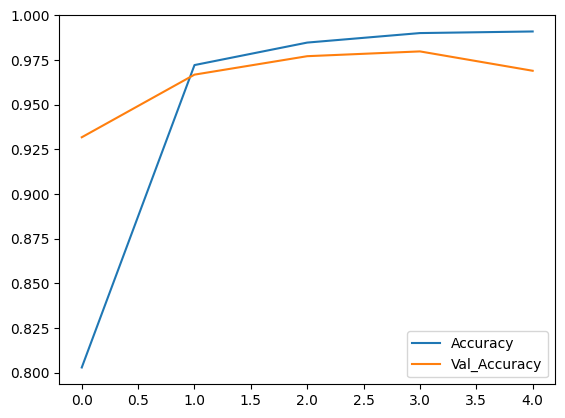

In [28]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

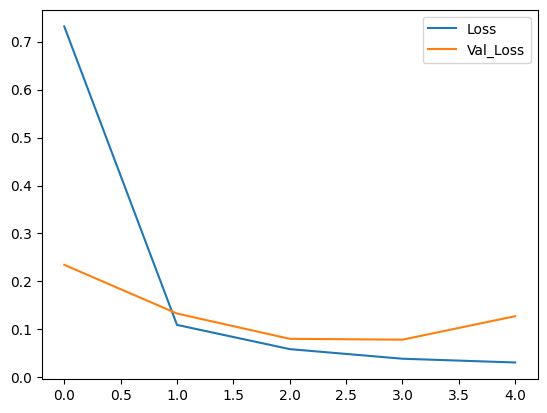

In [29]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.legend();

In [30]:
pred=model.predict(x_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [31]:
confusion_matrix(y_test,np.argmax(pred,axis=1))

array([[ 40,   0,   0, ...,   0,   0,   0],
       [  0, 442,   0, ...,   0,   0,   0],
       [  1,  10, 424, ...,   0,   0,   0],
       ...,
       [  0,   1,   1, ...,  77,   0,   0],
       [  0,   0,   0, ...,   0,  40,   0],
       [  0,   0,   0, ...,   0,   0,  47]])

In [32]:
print(classification_report(y_test, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        41
           1       0.91      1.00      0.95       444
           2       0.99      0.95      0.97       444
           3       0.98      0.89      0.94       295
           4       1.00      0.89      0.94       396
           5       0.84      0.99      0.91       338
           6       0.93      1.00      0.96        87
           7       1.00      0.96      0.98       324
           8       0.94      0.98      0.96       260
           9       1.00      0.99      0.99       274
          10       1.00      0.98      0.99       417
          11       0.98      0.99      0.99       258
          12       0.96      1.00      0.98       453
          13       1.00      0.97      0.98       431
          14       1.00      0.99      0.99       165
          15       1.00      0.87      0.93       134
          16       1.00      0.99      0.99        72
          17       1.00    

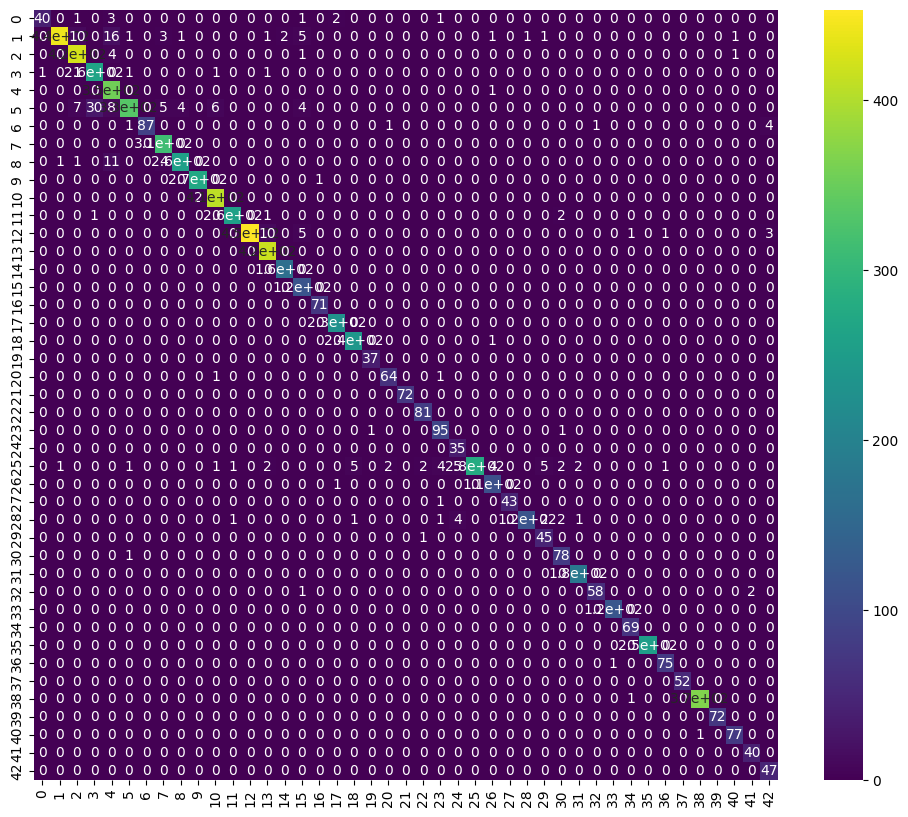

In [33]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(np.argmax(pred,axis=1), y_test)
sns.heatmap(cm, annot=True, cmap='viridis');

In [78]:
model.save('gtsrb.h5')
#We save our model.

### Predict the Images

In [74]:
img=cv2.imread('/kaggle/input/gtsrb-german-traffic-sign/Test/00021.png')

In [75]:
img=cv2.resize(img,(32,32))
img=img/255.0
img=np.array(img)

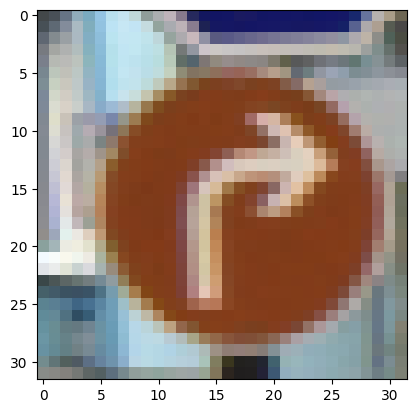

In [76]:
plt.imshow(img)

In [77]:
img=np.expand_dims(img, axis=0)
pred=model.predict(img)
print('Class name:',np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Class name: 6


### Summary

The GTSRB CNN project is an effective application for automatic recognition of traffic signs. The project has important applications in areas such as traffic safety and autonomous driving systems. We successfully trained our model in the project. Then, we tested whether it could correctly predict the class name with the test data. It predicted correctly. We turned our project into a website. We successfully completed our project.